In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm
print("Setup Done")

# **Mô tả bài toán**

Cho các dữ liệu về các câu hỏi trên Quora dạng text và phân loại của chúng(Có phải toxic hay không?)

Đánh giá xem dữ liệu cho có phải là câu hỏi toxic hay không?

    Nhập dữ liệu từ file.

In [ ]:
raw_train_data = pd.read_csv('/kaggle/input/quora-insincere-questions-classification/train.csv')
raw_test_data = pd.read_csv('/kaggle/input/quora-insincere-questions-classification/test.csv')
raw_train_data

    Dữ liệu trên tập Train.

In [ ]:
raw_train_data.head()

    Dữ liệu trên tập Test.

In [ ]:
raw_test_data.head()

In [ ]:
print(len(raw_train_data[raw_train_data.target == 0]))
print(len(raw_train_data[raw_train_data.target == 1]))

> # **Bình luận** :

> **Nhận xét**
> * Dữ liệu trên tập dữ liệu gồm qid(dùng để test trong cuộc thi),question_text(dữ liệu văn bản của câu hỏi) và target(Có phải câu hỏi toxic hay không)
> * Chúng ta sẽ không quan sát được dữ liệu như thế nào chỉ từ những câu hỏi dạng text như thế này

> **Vấn đề nảy sinh**
> * Cần phải đưa dữ liệu câu hỏi dạng text về một dạng có thể quan sát được

# **Chương 1:Tiền xử lý dữ liệu**
> Trước tiên,cần xử lý qua dữ liệu text này trước.Những việc cần phải làm những việc sau:
> * **Quan sát,đánh giá dữ liệu.**
> * **Xử lý dữ liệu.**

****

> # **1.Quan sát dữ liệu**
> Việc đầu tiên,chúng ta cần xem xét qua dữ liệu đã có nhằm vạch ra một phương hướng xử lý dữ liệu phù hợp.

> # **1.1-Vấn đề**
> * Phải đưa dữ liệu về một dạng có thể quan sát được.
> * Quan sát,đánh giá và đưa ra phương hướng tiền xử lý dữ liệu hiệu quả



> # **1.2-Giải pháp**
> * **Đưa dữ liệu về dạng có thể quan sát được** : Từ một cột dạng text,chúng ta thêm các thuộc tính: độ dài của một câu hỏi,số lượng từ trong một câu hỏi,số lượng các chữ số trong câu,số lượng các kí tự đặc biệt số lượng các từ duy nhất trong câu.
> * **Quan sát,đánh giá dữ liệu** : Vẽ các biểu đồ dựa vào các thuộc tính mới trên để có một cái nhìn tổng quan nhất về dữ liệu(Sử dụng biểu đồ violin để thấy được mật độ xác suất dữ liệu)

> > # 1.2.1-Đưa dữ liệu về dạng có thể quan sát được

    Thêm các thuộc tính mới cho dữ liệu

In [ ]:

    raw_train_data['qlen'] = raw_train_data['question_text'].str.len() 
    raw_train_data['n_words'] = raw_train_data['question_text'].apply(lambda row: len(row.split(" ")))
    raw_train_data['numeric_words'] = raw_train_data['question_text'].apply(lambda row: sum(c.isdigit() for c in row))
    raw_train_data['sp_char_words'] = raw_train_data['question_text'].str.findall(r'[^a-zA-Z0-9 ]').str.len()
    raw_train_data['unique_words'] = raw_train_data['question_text'].apply(lambda row: len(set(str(row).split())))

In [ ]:
raw_train_data.head()

> > **Nhận xét**: Dữ liệu đã có thể quan sát và trông rõ ràng hơn rất nhiều.

> > # 1.2.2-Quan sát,đánh giá dữ liệu

> > **1.2.2.1-Xem số lượng label toxic và label không toxic trên tập dữ liệu**

> > **Biểu đồ so sánh số lượng hai nhãn trên tập dữ liệu**

In [ ]:
raw_train_data.groupby("target")['qid'].count().plot.bar()

    Do chỉ có 2 nhãn 0/1 ,ta sử dụng hàm mean() để lấy ra tỉ lệ những câu hỏi không toxic trong toàn bộ tập dữ liệu

In [ ]:
print('~> Percentage of Sincere Questions (is_duplicate = 0):\n   {}%'.format(100 - round(raw_train_data['target'].mean()*100, 2)))
print('\n~> Percentage of Insincere Questions (is_duplicate = 1):\n   {}%'.format(round(raw_train_data['target'].mean()*100, 2)))

> > **Nhận xét** : Tỉ lệ của các câu hỏi trung thực là 93,81%,các câu hỏi không trung thực là 6.19% trên toàn bộ tập train cho thấy sự chênh lệch quá lớn giữa 2 nhãn.Việc chênh lệch này cực kỳ không tốt,có thể làm cho model sau này hoạt động kém hiệu quả

> > **1.2.2.2-Sự phân bố về số lượng từ trong các câu ở 2 nhãn trên tập dữ liệu**

> > **Biểu đồ phân bố số lượng từ**

In [ ]:
plt.figure(figsize=(8, 16))
sns.violinplot(x = 'target', y = 'n_words', data = raw_train_data[0:])
plt.yticks(ticks=[0,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120])
plt.show()

> > **Nhận xét**:
> > * **Câu hỏi không toxic**:
     * số lượng từ phần lớn giao động trong khoảng 2-30 từ,số lượng từ nhỏ nhất trong một câu là 1 từ,lớn nhất là khoảng 120 từ
> > * **Câu hỏi toxic**:
     * số lượng từ  phần lớn giao động trong khoảng 2-40 từ,số lượng từ nhỏ nhất là 1 từ,lớn nhất là khoảng 70 từ

> > **1.2.2.3-Sự phân bố về số lượng chữ số trong các câu ở 2 nhãn trên tập dữ liệu**

> > **Biểu đồ phân bố các chữ số**

In [ ]:
plt.figure(figsize=(8, 20))
sns.violinplot(x = 'target', y = 'numeric_words', data = raw_train_data[0:])
plt.yticks(ticks=[0,2,4,6,8,10,50,100,150,200])
plt.show()

> > **Nhận xét**:
> > * **Câu hỏi không toxic**:
     * số lượng chữ số phần lớn giao động trong khoảng 0-4 từ,số lượng chữ số nhỏ nhất trong một câu là 0 chữ số,lớn nhất là khoảng 230 chữ số
> > * **Câu hỏi toxic**:
     * số lượng chữ số phần lớn giao động trong khoảng 0-1 từ,số lượng chữ số nhỏ nhất là 0 chữ số,lớn nhất là khoảng 90 chữ số

> > => câu hỏi toxic có vẻ ít chữ số hơn câu hỏi không toxic

> > **1.2.2.3-Sự phân bố về số lượng kí tự đặc biệt trong các câu ở 2 nhãn trên tập dữ liệu**

> > **Biểu đồ phân bố các kí tự đặc biệt**

In [ ]:
plt.figure(figsize=(8, 20))
sns.violinplot(x = 'target', y = 'sp_char_words', data = raw_train_data[0:])
plt.yticks(ticks=[0,5,10,20,30,40,50,100,200,300,400])
plt.show()

> > **Nhận xét**:
> > * **Câu hỏi không toxic**:
     * số lượng kí tự đặc biệt phần lớn giao động trong khoảng 0-4 từ,số lượng kí tự đặc biệt nhỏ nhất là 0,lớn nhất là khoảng 170
> > * **Câu hỏi toxic**:
     * số lượng kí tự đặc biệt phần lớn giao động trong khoảng 0-7 từ,số lượng kí tự đặc biệt nhỏ nhất là 0,lớn nhất là khoảng 420
     
> > => có thể thấy được số lượng kí tự đặc biệt trong câu hỏi toxic,nhiều hơn nhiều so với câu hỏi không toxic

> > **1.2.2.4-Sự phân bố về số lượng từ duy nhất trong các câu ở 2 nhãn trên tập dữ liệu**

> > **Biểu đồ về sự phân bố các từ duy nhất**

In [ ]:
plt.figure(figsize=(8, 16))
sns.violinplot(x = 'target', y = 'unique_words', data = raw_train_data[0:])
plt.yticks(ticks=[0,2,4,6,8,10,20,30,40,50,60,80,100])
plt.show()

> > **Nhận xét**:
> > * **Câu hỏi không toxic**:
     * số lượng từ duy nhất phần lớn giao động trong khoảng 3-20 từ,số lượng từ duy nhất nhỏ nhất là 2,lớn nhất là khoảng 90
> > * **Câu hỏi toxic**:
     * số lượng từ duy nhất phần lớn giao động trong khoảng 2-30 từ,số lượng từ duy nhất nhỏ nhất là 2,lớn nhất là khoảng 50
     
> > => số lượng từ duy nhất trong câu hỏi toxic có phân bố dàn trải hơn câu hỏi không toxic trên tập dữ liệu

> # **1.3-Kết quả**
> Dữ liệu đã dễ quan sát hơn rất nhiều và có thể thu thập được nhiều thông tin hữu ích hơn,hoàn toàn có thể đưa ra hướng xử lý dữ liệu thô tốt

> # **1.4-Bình luận** :
>  * **Nhận xét**:
>   * **Tỉ lệ các nhãn trên tập dữ liệu**: Tỉ lệ giữa câu hỏi toxic và không toxic chênh lệch rất lớn(không toxic:93.81%,toxic:6,19%) dễ dàng có thể gây ảnh hưởng tới độ chính xác và hiệu quả của model sau này.
>   * **Dữ liệu có nhiều nhiễu**:Từ biểu đồ dữ liệu ở các cột số,kí tự đặc biệt có thể thấy rằng dữ liệu có rất nhiều nhiễu.
>  * **Vấn đề nảy sinh**:
>   * Cần cân bằng lại số lượng label trên tập dữ liệu.
>   * Cần loại bỏ bớt các nhiễu của dữ liệu
>  * **Ý kiến**:Còn thiếu dữ liệu quan sát cho các từ viết tắt

> # **2.Xử lý dữ liệu**
> Khi xử lý dữ liệu,cần lọc ra những dữ liệu cần thiết và không cần thiết cho việc dự đoán đánh giá của model,chia lại tập dữ liệu để cân bằng về mặt số lượng giữa 2 label và chia tập train,validation.

> # **2.1-Vấn đề**
> * **Cân bằng lại số lượng label cho tập dữ liệu**
> * **Loại bỏ nhiễu**

> # **2.2-Cách giải quyết**
> * **Cân bằng lại số lượng label cho tập dữ liệu**:Sử dụng resample để chia lại tập dữ liệu sao cho cân bằng về số lượng 2 nhãn hơn
> * **Loại bỏ nhiễu**:Sử dụng một hàm để lọc từ viết tắt và thư việc re để lọc kí tự đặc biệt + chữ số

> > # 2.2.1-Cân bằng lại số lượng label cho tập dữ liệu

> > **2.2.1.1-Chia lại tập dữ liệu theo tỉ lệ 3:1 bằng resample**

In [ ]:
#Chia lại tập dữ liệu theo tỉ lệ 3:1
from sklearn.utils import resample
sincere = raw_train_data[raw_train_data.target == 0]
insincere = raw_train_data[raw_train_data.target == 1]
raw_train_data = pd.concat([resample(sincere,replace = True,n_samples = len(insincere)*3), insincere])
print(len(raw_train_data[raw_train_data.target == 0]))
print(len(raw_train_data[raw_train_data.target == 1]))

> > **2.2.2.2-Chia tập train và tập validation**
> > Phải tách tập train và tập validation ra sớm,tránh tập validation có thể bị ô nhiễm bởi tập train trong quá trình tiền xử lý dữ liệu

    Chia dữ liệu ra tập traning và tập validation

In [ ]:
### chia ra thành 2 tập,tập train và tập validation
feature_name = ['question_text','target']
train_data = raw_train_data[feature_name]
train,val=train_test_split(train_data,test_size=0.3,stratify=train_data.target,random_state=123)
print("Shape of the Training set :",train.shape)
print("Shape of the Validation set :",val.shape)

    Chúng ta phải reset_index cho dữ liệu mới để đồng bộ.

In [ ]:
train = train.reset_index()
val = val.reset_index()
print(train.head())

> > # 2.2.2-Loại bỏ các từ viết tắt

> > **2.2.2.1 Loại bỏ các từ viết tắt**

In [ ]:
###Loại bỏ các từ viết tắt 

#Tạo một directory có key là các từ viết tắt và value là các từ không viết tắt của key
#Mục đích để thay thế các từ viết tắt bằng các từ chuẩn,để chuẩn bị tạo danh sách từ vựng
contractions={"I'm": 'I am',
 "I'm'a": 'I am about to',
 "I'm'o": 'I am going to',
 "I've": 'I have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'd": 'I would',
 "I'd've": 'I would have',
 'Whatcha': 'What are you',
 "amn't": 'am not',
 "ain't": 'are not',
 "aren't": 'are not',
 "'cause": 'because',
 "can't": 'can not',
 "can't've": 'can not have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "daren't": 'dare not',
 "daresn't": 'dare not',
 "dasn't": 'dare not',
 "didn't": 'did not',
 'didn’t': 'did not',
 "don't": 'do not',
 'don’t': 'do not',
 "doesn't": 'does not',
 "e'er": 'ever',
 "everyone's": 'everyone is',
 'finna': 'fixing to',
 'gimme': 'give me',
 "gon't": 'go not',
 'gonna': 'going to',
 'gotta': 'got to',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he've": 'he have',
 "he's": 'he is',
 "he'll": 'he will',
 "he'll've": 'he will have',
 "he'd": 'he would',
 "he'd've": 'he would have',
 "here's": 'here is',
 "how're": 'how are',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how's": 'how is',
 "how'll": 'how will',
 "isn't": 'is not',
 "it's": 'it is',
 "'tis": 'it is',
 "'twas": 'it was',
 "it'll": 'it will',
 "it'll've": 'it will have',
 "it'd": 'it would',
 "it'd've": 'it would have',
 'kinda': 'kind of',
 "let's": 'let us',
 'luv': 'love',
 "ma'am": 'madam',
 "may've": 'may have',
 "mayn't": 'may not',
 "might've": 'might have',
 "mightn't": 'might not',
 "mightn't've": 'might not have',
 "must've": 'must have',
 "mustn't": 'must not',
 "mustn't've": 'must not have',
 "needn't": 'need not',
 "needn't've": 'need not have',
 "ne'er": 'never',
 "o'": 'of',
 "o'clock": 'of the clock',
 "ol'": 'old',
 "oughtn't": 'ought not',
 "oughtn't've": 'ought not have',
 "o'er": 'over',
 "shan't": 'shall not',
 "sha'n't": 'shall not',
 "shalln't": 'shall not',
 "shan't've": 'shall not have',
 "she's": 'she is',
 "she'll": 'she will',
 "she'd": 'she would',
 "she'd've": 'she would have',
 "should've": 'should have',
 "shouldn't": 'should not',
 "shouldn't've": 'should not have',
 "so've": 'so have',
 "so's": 'so is',
 "somebody's": 'somebody is',
 "someone's": 'someone is',
 "something's": 'something is',
 'sux': 'sucks',
 "that're": 'that are',
 "that's": 'that is',
 "that'll": 'that will',
 "that'd": 'that would',
 "that'd've": 'that would have',
 'em': 'them',
 "there're": 'there are',
 "there's": 'there is',
 "there'll": 'there will',
 "there'd": 'there would',
 "there'd've": 'there would have',
 "these're": 'these are',
 "they're": 'they are',
 "they've": 'they have',
 "they'll": 'they will',
 "they'll've": 'they will have',
 "they'd": 'they would',
 "they'd've": 'they would have',
 "this's": 'this is',
 "those're": 'those are',
 "to've": 'to have',
 'wanna': 'want to',
 "wasn't": 'was not',
 "we're": 'we are',
 "we've": 'we have',
 "we'll": 'we will',
 "we'll've": 'we will have',
 "we'd": 'we would',
 "we'd've": 'we would have',
 "weren't": 'were not',
 "what're": 'what are',
 "what'd": 'what did',
 "what've": 'what have',
 "what's": 'what is',
 "what'll": 'what will',
 "what'll've": 'what will have',
 "when've": 'when have',
 "when's": 'when is',
 "where're": 'where are',
 "where'd": 'where did',
 "where've": 'where have',
 "where's": 'where is',
 "which's": 'which is',
 "who're": 'who are',
 "who've": 'who have',
 "who's": 'who is',
 "who'll": 'who will',
 "who'll've": 'who will have',
 "who'd": 'who would',
 "who'd've": 'who would have',
 "why're": 'why are',
 "why'd": 'why did',
 "why've": 'why have',
 "why's": 'why is',
 "will've": 'will have',
 "won't": 'will not',
 "won't've": 'will not have',
 "would've": 'would have',
 "wouldn't": 'would not',
 "wouldn't've": 'would not have',
 "y'all": 'you all',
 "y'all're": 'you all are',
 "y'all've": 'you all have',
 "y'all'd": 'you all would',
 "y'all'd've": 'you all would have',
 "you're": 'you are',
 "you've": 'you have',
 "you'll've": 'you shall have',
 "you'll": 'you will',
 "you'd": 'you would',
 "you'd've": 'you would have',
 'jan.': 'january',
 'feb.': 'february',
 'mar.': 'march',
 'apr.': 'april',
 'jun.': 'june',
 'jul.': 'july',
 'aug.': 'august',
 'sep.': 'september',
 'oct.': 'october',
 'nov.': 'november',
 'dec.': 'december',
 'I’m': 'I am',
 'I’m’a': 'I am about to',
 'I’m’o': 'I am going to',
 'I’ve': 'I have',
 'I’ll': 'I will',
 'I’ll’ve': 'I will have',
 'I’d': 'I would',
 'I’d’ve': 'I would have',
 'amn’t': 'am not',
 'ain’t': 'are not',
 'aren’t': 'are not',
 '’cause': 'because',
 'can’t': 'can not',
 'can’t’ve': 'can not have',
 'could’ve': 'could have',
 'couldn’t': 'could not',
 'couldn’t’ve': 'could not have',
 'daren’t': 'dare not',
 'daresn’t': 'dare not',
 'dasn’t': 'dare not',
 'doesn’t': 'does not',
 'e’er': 'ever',
 'everyone’s': 'everyone is',
 'gon’t': 'go not',
 'hadn’t': 'had not',
 'hadn’t’ve': 'had not have',
 'hasn’t': 'has not',
 'haven’t': 'have not',
 'he’ve': 'he have',
 'he’s': 'he is',
 'he’ll': 'he will',
 'he’ll’ve': 'he will have',
 'he’d': 'he would',
 'he’d’ve': 'he would have',
 'here’s': 'here is',
 'how’re': 'how are',
 'how’d': 'how did',
 'how’d’y': 'how do you',
 'how’s': 'how is',
 'how’ll': 'how will',
 'isn’t': 'is not',
 'it’s': 'it is',
 '’tis': 'it is',
 '’twas': 'it was',
 'it’ll': 'it will',
 'it’ll’ve': 'it will have',
 'it’d': 'it would',
 'it’d’ve': 'it would have',
 'let’s': 'let us',
 'ma’am': 'madam',
 'may’ve': 'may have',
 'mayn’t': 'may not',
 'might’ve': 'might have',
 'mightn’t': 'might not',
 'mightn’t’ve': 'might not have',
 'must’ve': 'must have',
 'mustn’t': 'must not',
 'mustn’t’ve': 'must not have',
 'needn’t': 'need not',
 'needn’t’ve': 'need not have',
 'ne’er': 'never',
 'o’': 'of',
 'o’clock': 'of the clock',
 'ol’': 'old',
 'oughtn’t': 'ought not',
 'oughtn’t’ve': 'ought not have',
 'o’er': 'over',
 'shan’t': 'shall not',
 'sha’n’t': 'shall not',
 'shalln’t': 'shall not',
 'shan’t’ve': 'shall not have',
 'she’s': 'she is',
 'she’ll': 'she will',
 'she’d': 'she would',
 'she’d’ve': 'she would have',
 'should’ve': 'should have',
 'shouldn’t': 'should not',
 'shouldn’t’ve': 'should not have',
 'so’ve': 'so have',
 'so’s': 'so is',
 'somebody’s': 'somebody is',
 'someone’s': 'someone is',
 'something’s': 'something is',
 'that’re': 'that are',
 'that’s': 'that is',
 'that’ll': 'that will',
 'that’d': 'that would',
 'that’d’ve': 'that would have',
 'there’re': 'there are',
 'there’s': 'there is',
 'there’ll': 'there will',
 'there’d': 'there would',
 'there’d’ve': 'there would have',
 'these’re': 'these are',
 'they’re': 'they are',
 'they’ve': 'they have',
 'they’ll': 'they will',
 'they’ll’ve': 'they will have',
 'they’d': 'they would',
 'they’d’ve': 'they would have',
 'this’s': 'this is',
 'those’re': 'those are',
 'to’ve': 'to have',
 'wasn’t': 'was not',
 'we’re': 'we are',
 'we’ve': 'we have',
 'we’ll': 'we will',
 'we’ll’ve': 'we will have',
 'we’d': 'we would',
 'we’d’ve': 'we would have',
 'weren’t': 'were not',
 'what’re': 'what are',
 'what’d': 'what did',
 'what’ve': 'what have',
 'what’s': 'what is',
 'what’ll': 'what will',
 'what’ll’ve': 'what will have',
 'when’ve': 'when have',
 'when’s': 'when is',
 'where’re': 'where are',
 'where’d': 'where did',
 'where’ve': 'where have',
 'where’s': 'where is',
 'which’s': 'which is',
 'who’re': 'who are',
 'who’ve': 'who have',
 'who’s': 'who is',
 'who’ll': 'who will',
 'who’ll’ve': 'who will have',
 'who’d': 'who would',
 'who’d’ve': 'who would have',
 'why’re': 'why are',
 'why’d': 'why did',
 'why’ve': 'why have',
 'why’s': 'why is',
 'will’ve': 'will have',
 'won’t': 'will not',
 'won’t’ve': 'will not have',
 'would’ve': 'would have',
 'wouldn’t': 'would not',
 'wouldn’t’ve': 'would not have',
 'y’all': 'you all',
 'y’all’re': 'you all are',
 'y’all’ve': 'you all have',
 'y’all’d': 'you all would',
 'y’all’d’ve': 'you all would have',
 'you’re': 'you are',
 'you’ve': 'you have',
 'you’ll’ve': 'you shall have',
 'you’ll': 'you will',
 'you’d': 'you would',
 'you’d’ve': 'you would have'}

#Hàm chuyển đổi các từ viết tắt thành các cụm từ chuẩn,không viết tắt
def contraction_fix(word):
    try:
        a=contractions[word]#nếu word là từ viết tắt có trong bộ từ viết tắt => a sẽ là cụm từ không viết tắt của word
    except KeyError:
        a=word # nếu không có key nào trong directory phù hợp với word đã cho=> a sẽ vẫn là word
    return a #trả về từ vựng(Cụm từ vựng không viết tắt)

> > **2.2.2.2 Loại bỏ các số,kí tự đặc biệt**

In [ ]:
###Loại bỏ các chữ số,các kí tự đặc biệt
import re
def Preprocess(doc): #Hàm loại bỏ các chữ số,các kí tự đặc biệt
    corpus=[]
    for text in tqdm(doc):
        text=" ".join([contraction_fix(w) for w in text.split()])   #tách các từ,thay thế các từ viết tắt bằng các từ đúng,sau đó nối chúng lại
        
        #re là một module để xác định biểu thức chính quy
        text=re.sub(r'[^a-z0-9A-Z]'," ",text)#Loại bỏ các dấu như !,?.... thay bằng các ' '
        text=re.sub(r'[0-9]{1}',"#",text)#Loại bỏ các số,thay bằng các '#'
        text=re.sub(r'[0-9]{2}','##',text)
        text=re.sub(r'[0-9]{3}','###',text)
        text=re.sub(r'[0-9]{4}','####',text)
        text=re.sub(r'[0-9]{5,}','#####',text)
        corpus.append(text) #thêm dòng vừa rồi vào mảng corpus
    return corpus #trả về mảng các câu đã được lược bỏ số và các kí tự đặc biệt

    Xử lý,chuyển đổi dữ liệu thô sang dữ liệu đã được sơ chế,loại bỏ nhiễu

In [ ]:
train_processed_doc = Preprocess(train.question_text)
val_processed_doc = Preprocess(val.question_text)

    Kiểm tra xem hàm preprocess đã hoạt động đúng chưa

In [ ]:
for i in range(0,10,1):
    randIndex = random.randrange(0,train.question_text.size,1)
    print("Raw:" + train.question_text[randIndex])
    print("Process:" + train_processed_doc[randIndex])

> # **2.3-Kết quả** 
> Số lượng nhãn trong tập train đã cân bằng hơn;các số,từ viết tắt,chữ đã được loại bỏ.Dữ liệu bây giờ sẽ tốt hơn cho mô hình của chúng ta

> # **2.4-Bình luận** :
>  * **Nhận xét**:
>   * **Hàm lọc từ viết tắt**: Dữ liệu các từ viết tắt của hàm là thu thập bằng tay,vì thế có khả năng sẽ có những từ viết tắt không được thay đổi,không biết có một thư viện nào chuyên lọc những từ viết tắt như thế này không?
>   * **Cân bằng label trên tập dữ liệu**:Resample bằng cách undersampling nên có một lượng lớn dữ liệu các câu hỏi không toxic bị mất đi.
>  * **Ý kiến**:Tôi sẽ thử thêm oversampling với dữ liệu sau

# **Chương 2:Trích chọn đặc trưng từ dữ liệu,tạo vector dữ liệu**
> 
> Khi đã xử lý qua được dữ liệu,chúng ta cần tiếp tục chuyển đổi dữ liệu vừa được sơ chế đó sang dữ liệu có thể training cho model
> * **Tạo Vector từ dữ liệu bằng cách thủ công**
> * **Tạo Vector từ dữ liệu bằng tf-idf**

> # **1.Tạo Vector từ dữ liệu bằng cách thủ công**


> # **1.1-Vấn đề** 
> Làm sao để lấy ra được từ vựng và số lượng của mỗi từ vựng từ văn bản đã qua xử lý,sau đó kiến tạo vector feature từ những từ vựng đã thu được đó.

> # **1.2-Cách giải quyết** 
>  * **Lấy ra từ vựng** : Khởi tạo một dictionary rỗng,lặp qua các câu,dùng thư viện của python để tách từ trong các câu.Mỗi khi quét đến một từ nào đó,kiểm tra xem từ đó có trong dictionary từ vựng hay không.Nếu có,cộng thêm 1 vào value của từ đó trong directory(từ đó là key của phần tử trong dictionary).Nếu không,khởi tạo một phần tử mới cho directory với key = từ đó và value = 1.
>  * **Kiến tạo vector feature**:
>    * Phương án 1:Tạo vector đặc từ toàn bộ từ vựng đã có.
>    * Phương án 2:Tạo vector thưa từ toàn bộ từ vựng đã có.

> > # 1.2.1-Lấy ra từ vựng cho bag of word

    Hàm lấy từ vựng từ các đoạn văn bản

In [ ]:
###Sau khi đã có hàm tiền xử lý cần thiết,tạo hàm lấy ra vốn từ vựng

def get_vocab(corpus):
    vocab={}#Đây là vốn từ vựng của chúng ta(Directory)
    for text in tqdm(corpus): #Lặp qua các câu trong danh sách câu đã được xử lý
        for word in text.split(): #Lặp qua các từ trong các câu
            try:
                vocab[word]+=1 #Nếu từ đó đã có rồi,+1 thêm vào số lượng của từ đó
            except KeyError:
                vocab[word]=1 #Nếu chưa có từ đó,tạo ra 1 key = word và value = 1 mới trong vocab(Directory)
    vocab=dict(sorted(vocab.items(),reverse=True ,key=lambda item: item[1]))#Sắp kếp lại các Key
    return vocab  # Hàm trả về một dictionary có các key là toàn bộ từ vựng của văn bản 
                  #và value là số lượng từ đó xuất hiện trong toàn bộ văn bản

    Tiến hành lấy ra các từ vựng,và số lượng của các từ trong văn bản

In [ ]:
vocabulary = get_vocab(train_processed_doc)

> > # 1.2.2-Quan sát,đánh giá dữ liệu
   

> > **1.2.2.1-Miêu tả dữ liệu**

    Do dictionary đã tự động sắp xếp dữ liệu theo values từ lớn đến bé,nên chúng ta không cần sắp xếp lại nữa.
    Tạo dataframe để quan sát

In [ ]:
diagram_x = {'num_of_word' : list(vocabulary.values())}
df_index = list(vocabulary.keys())
df = pd.DataFrame(diagram_x,index=df_index)

    Những từ xuất hiện nhiều nhất.

In [ ]:
df[0 : 10]

    Những từ xuất hiện ít nhất

In [ ]:
df[-10:-1]

> > **1.2.2.2-Nhận xét**:
> > * Những từ có số lượng nhiều nhất là những từ thông thường hay gặp trong nhiều loại câu,ví dụ như từ 'the',có số lượng từ nhiều nhất vì nó là từ có thể gặp trong rất nhiều thể loại câu => gần như nó không có tác dụng đặc trưng cho 1 loại câu cụ thể.
> > * Những từ có số lượng ít nhất có thể là những từ sai chính tả,hoặc tên riêng => những từ như vậy cũng không có tác dụng đặc trưng cho một loại câu cụ thể.

> > # 1.2.3-Tạo vector feature

> > **1.2.2.1-Dùng ma trận đặc**

    Hàm này sẽ tạo ra một mảng 2 chiều,mỗi phần tử của mảng là một câu,mỗi phần tử của phần tử của mảng là số lần từ tương ứng với vị trí(trong từ vựng) xuất hiện trong câu

In [ ]:
##thử xử lý dữ liệu theo kiểu nguyên thủy nhất :))))
def naiveProcessData(raw_data):
    processedData = []
    for data in tqdm(raw_data):
        #tạo mới directory với các key là vocabulary và value = 0;
        processedSentence = vocabulary.copy()
        for key in dictOfVocabulary.keys():
            processedSentence[key] = 0
        
        #cộng 1 với mỗi word có trong câu.
        for word in data.split():
            try:
                processedSentence[word] += 1;    
            except:
                print(word + "is not in bag of word")
        processedData.append(np.array(processedSentence.values()))
    return processedData

In [ ]:
### Test
#processedSentence = vocabulary.copy()
#for key in dictOfVocabulary.keys():
#   processedSentence[key] = 0
#print(np.array(processedSentence.values()))

    Thử xử lý dữ liệu bằng cách vector hóa các câu sử dụng ma trận thường.

In [ ]:
#processedData = naiveProcessData(train_processed_doc);

> > **Nhận xét**: Cách sử dụng ma trận đặc không hề ổn chút nào,dữ liệu quá lớn dẫn đến còn không đủ bộ nhớ để lưu trữ ,không thể xử lý dữ liệu theo cách này.

> > **1.2.2.2-Dùng ma trận rỗng**

    Hàm này nhằm đánh số thứ tự cho các từ

In [ ]:
###Tạo hàm khởi tạo các giá trị cần thiết cho ma trận thưa
#Đầu tiên,phải đánh dấu vị trí của các từ trước
index_Vocabulary = vocabulary.copy()
def initIndexVocabulary(indexVocabulary):
    i = 0;
    for key in indexVocabulary.keys():
        indexVocabulary[key] = i
        i += 1

    Gọi hàm khởi tạo để đánh số thứ tự cho từng từ trong vocabulary(Tôi sẽ dùng tất cả từ vựng tìm được ở tập traning + 1 cột cho những từ không xuất hiện trong tập traning làm feature cho vector)

In [ ]:
initIndexVocabulary(index_Vocabulary)
#print(index_Vocabulary.items())

    Hàm này nhằm mục đích lấy ra những thông số cần thiết của dữ liệu(đã qua xử lý) để tạo ma trận thưa

In [ ]:
##Tạo một mảng dữ liệu 3 giá trị như sau: Hàng(dòng dữ liệu thứ mấy),cột(từ đó là từ thứ bao nhiêu trong vocabulary),giá trị(từ đó xuất hiện bao nhiêu lần)
def createConfigValueForMatixSprase(doc,vocab):
    rows = []
    columns = []
    values = []
    
    indexSentence = 0; # index của dữ liệu câu hỏi
    for sentence in tqdm(doc): #lặp qua từng câu hỏi trong kho dữ liệu
        dictOfWord = {}  #Khởi tạo tập hợp các từ có trong câu
        for word in sentence.split(): #Xét các từ bên trong một câu
            try: # Nếu tập hợp đã có từ đang xét,số lượng từ đó trong dict tăng lên 1
                dictOfWord[word] += 1;
            except: # Nếu tập hợp chưa có từ đang xét,thêm từ đó vào trong dict,với số lượng từ bằng 1
                dictOfWord.update({word:1})
        #Lặp qua tất cả các từ có trong từ điển của câu.
        for word in dictOfWord.keys():
            rows.append(indexSentence) #Thêm dữ liệu thứ tự dòng
            try:
                columns.append(vocab[word]) #Thêm dữ liệu thứ thự cột(Vị trí của từ trong index_Vocabulary)
            except:
                columns.append(len(vocab)) # Nếu từ đó không có trong vocabulary,cho nó xuống hang cuối cùng của từ vựng
            values.append(dictOfWord[word]) # Thêm dữ liệu về số lần xuất hiện của từ đó
        indexSentence += 1;
    return (rows,columns,values)

    Hàm tạo ma trận thưa

In [ ]:
from scipy.sparse import coo_matrix
def createSparseMatrix(data,vocab):
    rows,columns,values = createConfigValueForMatixSprase(data,vocab)
    return coo_matrix((values,(rows,columns)),shape=(len(data),len(vocab) + 1))

    Khởi tạo ma trận thưa cho tập traning 

In [ ]:
train_simple_X = createSparseMatrix(train_processed_doc,index_Vocabulary)
label_X = train.target

    Khởi tạo ma trận thưa cho tập validation

In [ ]:
valid_simple_X = createSparseMatrix(val_processed_doc,index_Vocabulary)
label_y = val.target

> > **Nhận xét** :
> > * Khi lần đầu thử ,xử lý dữ liệu ở tập valid bị lỗi do có một số từ xuất hiện ở tập train nhưng lại không xuất hiện ở tập valid.Nên tôi sẽ quy ước những từ không gặp ở tập train,nhưng gặp ở tập valid là những từ ở cột cuối cùng
> > * Cách sử dụng ma trận rỗng có tốc độ nhanh hơn và ổn hơn rất nhiều so với cách dùng ma trận đặc 

># **1.3-Kết quả** : 
>  * **Lấy ra từ vựng** :Việc lấy ra từ vựng khá nhanh chóng và chuẩn xác
>  * **Kiến tạo vector feature**:
>   * Khi sử dụng phương án 1:thời gian để tạo một ma trận dữ liệu cho toàn bộ dữ liệu cực kỳ lâu do số lượng từ mỗi câu ít hơn rất nhiều số lượng từ của cả đoạn văn,không có khả năng ứng dụng trong việc xử lý tạo vector feature.
>   * Khi sử dụng phương án 2:thời gian để tạo một ma trận thưa cho toàn bộ dữ liệu nhanh hơn rất nhiều so với phương án một,có khả năng áp dụng trong việc xử lý dữ liệu.

> # **1.4-Bình luận** : 
>  * **Vấn đề nảy sinh**:
>   * Việc xử lý thủ công,không sử dụng thư viện như thế này rất tốn thời gian và công sức,đòi hỏi phải viết code xử lý khá nhiều và mất thời gian.
>  * **Ý kiến**:Giải quyết như thế này chưa ổn lắm
>   * Ưu điểm:Đơn giản,dễ hiểu,dễ áp dụng cho cả người thực hiện lần người đọc;người viết code có thể quản lý và kiểm soát hoàn toàn bag-of-word
>   * Nhược điểm:rất rõ ràng,do sử dụng bag-of-word nên thông tin về thứ tự từ trong câu đã bị mất.Hơn nữa,việc trích chọn các từ đặc trưng hơn các từ khác là vô cùng khó khăn vì không thể biết được độ đặc trưng của một từ thông qua số lượng từ đó được.Số lượng feature = từ vựng nên rất tốn bộ nhớ mà mất thời gian trong việc traing các model


> #  **2.Tạo Vector từ dữ liệu bằng tf-idf**

> # **2.1-Vấn đề**:
Việc xử lý dữ liệu theo cách thủ công rõ ràng đã để lộ điểm yếu về sự thiếu hụt các trọng số thể hiện đặc trưng cho các từ vựng cũng như lượng bộ nhớ quá lớn cần sử dụng.Vì thế cần sử dụng thư viện tf-idf khi xử lý để có trọng số tf-idf(trọng số đặc trưng) cho từ word,nhằm mục đích chọn lựa những từ đặc trưng nhất để training model hiệu quả hơn,giảm thời gian và bộ nhớ xuống.Vấn đề đặt ra là dùng bao nhiêu từ thì hợp lý,và chọn những từ nào làm feature để lượng thông tin bị mất đi ít nhất.

># **2.2-Giải pháp**:
> * **Lấy ra từ vựng**:Chúng ta cần thử nghiệm,điều chỉnh các tham số để có được một bộ tham số tốt nhất,sau đó sử dụng các tham số đó.

> ># 2.2.1-Lấy ra từ vựng:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',stop_words='english',min_df=4,max_df=0.8) #khởi tạo,cài đặt số lượng tối đa cho feature
tf.fit(train_processed_doc) #các feature(từ vựng) sẽ được lấy từ tập traning

> > **Nhận xét**:Sau nhiều lần thử nghiệm,bộ tham số trên(analyzer='word',stop_words='english',min_df=4,max_df=0.8) có thể cho kết quả khá tốt

    Lấy tên các feature sau khi tf-idf đã học xong từ vựng.

In [ ]:
feature_names = tf.get_feature_names()

> ># 2.2.2-Tạo Ma trận thưa bằng TfidfVectorizer 

In [ ]:
train_tfidf_X = tf.transform(train_processed_doc)
val_tfidf_X = tf.transform(val_processed_doc)

In [ ]:
print(len(train_processed_doc))
print(len(feature_names))

># **2.3-Kết quả**:
> * **Lấy ra từ vựng**:TfidfVectorizer có các hàm phụ trợ lấy từ vựng rất tốt nhờ các tham số như 'min_df' và 'max_df'
> * Từ vựng lấy ra thể hiện tính đăch trưng cao(Sẽ được giải thích ở phần kết luận ở cuối bài)

> # **2.4-Bình luận** : 
>  * **Ý kiến**:
>   * Ưu điểm:Dễ áp dụng,không cần code nhiều,nhanh chóng,tiện lợi,tiết kiệm thời gian
>   * Nhược điểm:Mất khá nhiều thời gian để hiểu sâu về tham số và cách hoạt động của tfidfVectorizer.

# **Chương 3:Training Model và thử nghiệm**

    Import các thư viện cần thiết

In [ ]:
##Import
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report
from sklearn import svm

> #  **1.Hàm đánh giá**
>   **Chúng ta sẽ dựa vào 4 chỉ số Precision,Recall,F1-Score và Accurancy để đánh giá tính hiệu quả của model**

In [ ]:
#Đánh giá model qua tập validation
def validModel(Model,valid_model_X):
    valid_y = val.target;
    pred_y = Model.predict(valid_model_X)
    print(classification_report(label_y,pred_y))

> #  **2.Sử dụng LogisticRegression**

> # **2.1-Với dữ liệu được xử lý bằng cách đơn giản**

> **Training**

In [ ]:
simple_logistic = LogisticRegression(penalty="l2", C=1,max_iter=800) 
simple_logistic.fit(train_simple_X,label_X)

> **Đánh giá**

In [ ]:
validModel(simple_logistic,valid_simple_X)

> # **2.2-Với dữ liệu được xử lý bằng tf-idf**

> **Training**

In [ ]:
tfidf_logistic = LogisticRegression(penalty="l2", C=1,max_iter=400) 
tfidf_logistic.fit(train_tfidf_X,label_X)

> **Đánh giá**

In [ ]:
validModel(tfidf_logistic,val_tfidf_X)

> > **Nhận xét**: Các chỉ số khá tốt,f1-score = 0.76

> #  **3.Sử dụng MultinomialNB**

> # **3.1-Với dữ liệu được xử lý bằng cách đơn giản**

    Training Model với dữ liệu được xử lý theo cách đơn giản

In [ ]:
#Training Model MultinomialNB()
simple_multi_NB_model = MultinomialNB()
simple_multi_NB_model.fit(train_simple_X,label_X)

> **Đánh giá**

In [ ]:
validModel(simple_multi_NB_model,valid_simple_X)

    92.68 %,khá ổn

> # **3.2-Với dữ liệu được xử lý bằng tf-idf**

    Training Model với dữ liệu được xử lý theo tfidf

In [ ]:
tfidf_multi_NB_model = MultinomialNB()
tfidf_multi_NB_model.fit(train_tfidf_X,label_X)

> **Đánh giá**

In [ ]:
validModel(tfidf_multi_NB_model,val_tfidf_X)

> # **4.Sử dụng BernoulliNB**

> # **4.1-Với dữ liệu được xử lý bằng cách đơn giản**

    Training Mode với dữ liệu được xử lý bằng cách đơn giản

In [ ]:
simple_ber_NB_model = BernoulliNB()
simple_ber_NB_model.fit(train_simple_X,label_X)

> **Đánh giá**

In [ ]:
validModel(simple_ber_NB_model,valid_simple_X)

    93,09% ,cao hơn MultinomialNB một chút

> # **4.2-Với dữ liệu được xử lý bằng tf-idf**

> **Training**

In [ ]:
tfidf_ber_NB_model = BernoulliNB()
tfidf_ber_NB_model.fit(train_tfidf_X,label_X)

> **Đánh giá**

In [ ]:
validModel(tfidf_ber_NB_model,val_tfidf_X)

> # **5.Sử dụng XGBoost**

> # **5.1-Với dữ liệu được xử lý bằng cách đơn giản**

> **Training**

In [ ]:
simple_GBClassifier_model = GradientBoostingClassifier(max_features=0.2,n_estimators=150)
simple_GBClassifier_model.fit(train_simple_X,label_X)

> **Đánh giá**

In [ ]:
validModel(simple_GBClassifier_model,valid_simple_X)

> # **5.2-Với dữ liệu được xử lý bằng tf-idf**

> **Training**

In [ ]:
tfidf_GBClassifier_model = GradientBoostingClassifier(max_features=0.2, n_estimators=150)
tfidf_GBClassifier_model.fit(train_tfidf_X,label_X)

> **Đánh giá**

In [ ]:
validModel(tfidf_GBClassifier_model,val_tfidf_X)

> # **6.Sử dụng AdaBoostClassifier**

> # **6.1-Với dữ liệu được xử lý bằng tf-idf**

> **Training**

In [ ]:
tfidf_AdaBoost_model = AdaBoostClassifier(n_estimators=1000)
tfidf_AdaBoost_model.fit(train_tfidf_X,label_X)

> **Đánh giá**

In [ ]:
validModel(tfidf_AdaBoost_model,val_tfidf_X)

# **Chương 4:Tổng kết**
* **Precision**:Có bao nhiêu % mẫu positive được mô hình dự đoán chính xác so với tổng số mẫu positive được mô hình dự đoán.
* **Recall**: Có bao nhiêu % mẫu positive được mô hình dự đoán chính xác so với tổng số mẫu positive trong thực tế.
* **F1-Score**: Một trị số trung bình giữa Precision và Recall,trị số này càng cao thì mô hình càng tốt
* **Accurancy**: Có bao nhiêu % mẫu được dự đoán chính xác so với tổng toàn bộ số mẫu đang có.

> # **1.Xử lý dữ liệu**

> # **1.1-So sánh các chỉ số Precision,Recall và F1-Score,Accurancy trên một số mô hình**

> > # 1.1.1-Biểu đồ so sánh

> > **Biểu đồ 3 chỉ số Precision,Recall và F1-Score**

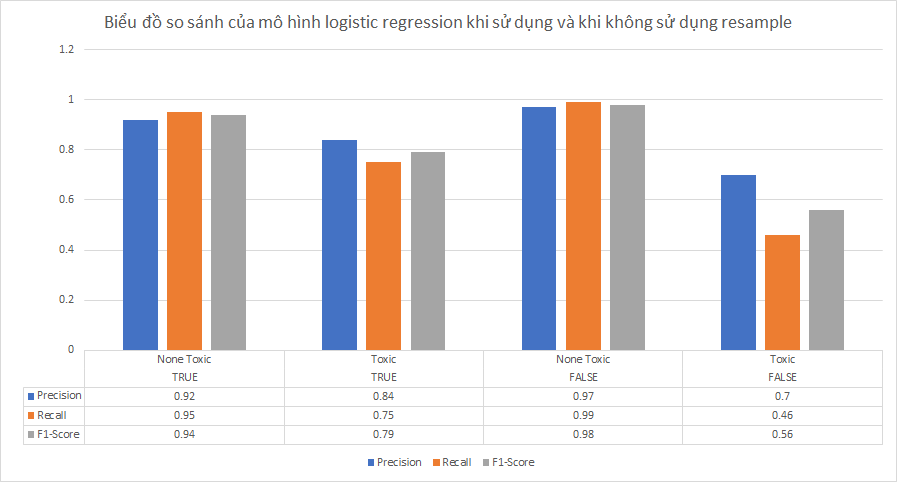

> > **Biểu đồ chỉ số accurancy**

> > # 1.1.2-Nhận xét
> > * **Có thể thấy rằng,các chỉ số Precision,Recall,F1-Score không khác nhau là mấy khi dự đoán những câu hỏi không toxic ở cả hai trường hợp,nhưng lại khác biệt rất rõ rệt khi dự đoán các câu hỏi toxic.Recall và F1-Score được tăng lên rõ rệt nhờ resample**
> > * **Mặc dù accurancy khi không dùng resample cao hơn khi dùng resample(Vì chúng ta sử dụng under resampling),nhưng F1-Score lại thấp hơn khá nhiều.Rõ ràng,khi không sử dụng resample,số label toxic ít hơn số label không toxic quá nhiều(khoảng 16 lần) dẫn đến accurancy không còn đáng tin cậy,nên có thể nhận xét rằng,logistic regression tốt hơn khi sử dụng resample**

> # **1.2-So sánh các chỉ số Precision,Recall và F1-Score trên mô hình XGBoost(Sử dụng tfidf)**

> > **Biểu đồ 3 chỉ số Precision,Recall và F1-Score**

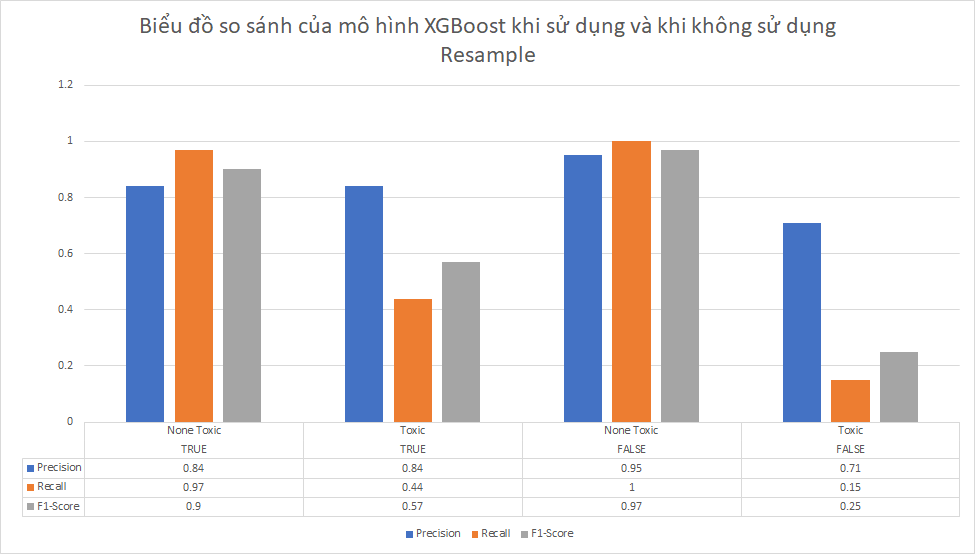

> > **Biểu đồ chỉ số accurancy**

> > # 1.2.2-Nhận xét
> > * **Ở các biểu đồ phần 1.2 này,chúng ta còn thấy rõ ràng hơn việc thiên lệch label quá lớn đã ảnh hưởng đến model nhiều như thế nào.Việc XGBoost cố gắng fit với lượng dữ liệu dán nhãn label không toxic(nhiều gấp 16 lần nhãn không toxic) đã dẫn đến chí số Recall và F1-Score của các câu hỏi toxic có giá trị rất tồi.Ngay cả khi sử dụng resample(nhãn không toxic nhiều gấp 3 lần nhãn toxic),2 chỉ số này ở các câu hỏi toxic vẫn thấp hơn nhiều ở câu hỏi không toxic.**
> > * **Mặc dù accurancy khi không sử dụng resample là rất tốt,nhưng sự thiên lệch dữ liệu khiến cho accurancy không còn đáng tin cậy.Khi nhìn vào chỉ số Recall và F1-Score(rất tồi) khi không sử dụng resample,chúng ta có thể thấy rõ được sự không đáng tin cậy đó.**
> > * **Thời gian khi dùng resample cũng nhanh hơn nhiều so với lúc không dùng resample**

> # **1.2-Bình luận**
> * **Kết quả so sánh trên đã cho thấy sự ảnh hưởng tiêu cực của việc thiên lệch nhãn tới các mô hình(Nhất là những mô hình học kết hợp như XGBoost) và cho thấy tính hiệu quả của resample với những mẫu dữ liệu bị thiên lệch.**
> * **Chúng ta sẽ sử dụng các mẫu dữ liệu sử resample trong việc training model để tăng hiệu quả của model,giảm ảnh hương tiêu cực của sự thiên lệch model**
> * **Sử dụng thêm tfidf để giảm lượng từ vựng(Giảm feature mà vẫn đảm bảo tính đặc trưng của câu) để giảm thời gian training của các mô hình học kết hợp,tránh việc bị overfitting**

> # **2.Đánh giá về các loại model**

> # **2.1-Chỉ số đánh giá sự hiệu quả của các model(xử lý dữ liệu bằng resample,vector được tạo bởi tf-idf)**

> > # 2.1.1-So sánh các chỉ số Precision,Recall và F1-Score giữa các model(Bên phải là toxic,bên trái là không toxic tính từ tên của model)

> > > **Biểu đồ**

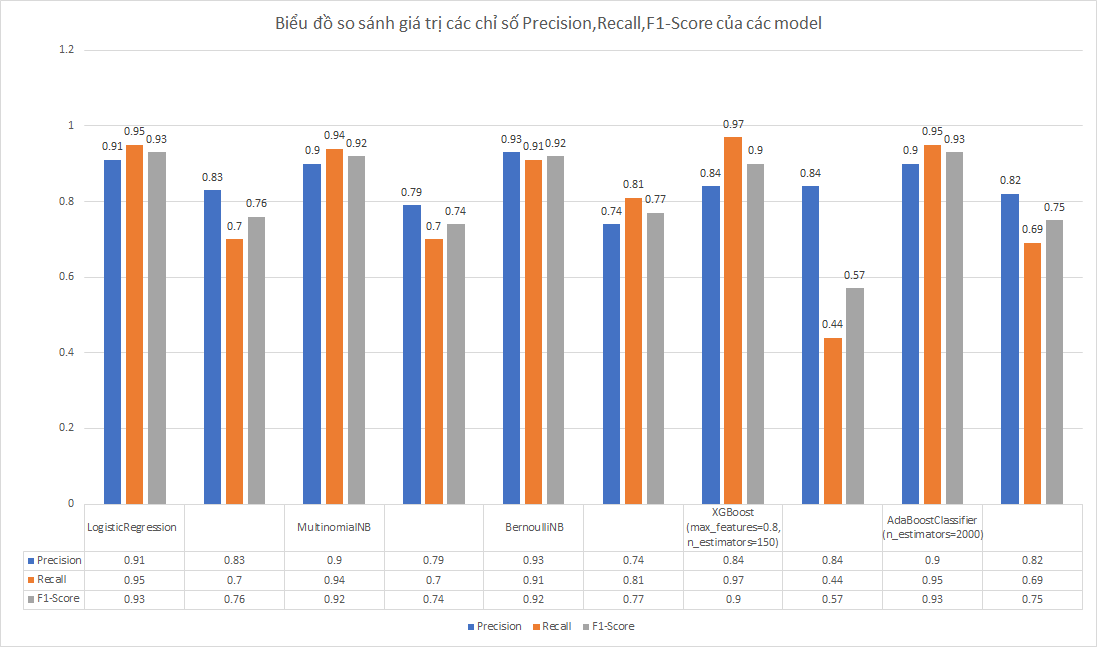

> > > **Bình luận**
> > > * **Một số quan sát thú vị**:
> > >  * Trong tất cả các model trên,chỉ số recall luôn nhỏ hơn chỉ số precision ở các câu hỏi toxic,ngoại trừ ở mô hình BernoulliNB(Recall là tỉ lệ bao nhiêu mẫu thực tế được xác định đúng).
> > >  * XGBoost có vẻ như không hiệu quả khi giải bài toán xử lý dữ liệu text(gồm rất nhiều feature) như thế này khi mà chỉ số Recall và F1 thấp hơn nhiều so với các model khác ở model toxic.
> > >  * Mặc dù adaboost có chỉ số F1-Score thấp hơn một chút so với Logistic Regression và  BernoulliNB(ở câu hỏi toxic),nhưng nó lại có thể tiếp tục cải thiện F1-Score bằng cách tăng n_estimators lên.

> > # 3.1.2-So sánh chỉ số Accurancy,và F1-Score(Toxic) giữa các model

> > > **Biểu đồ**

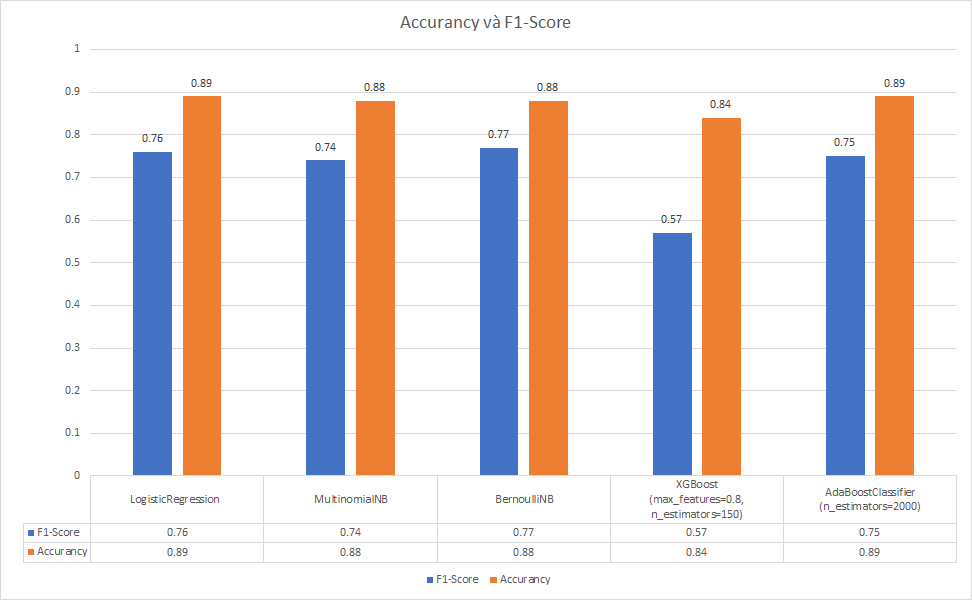

> > > **Nhận xét**:
> > > * Các mô hình truyền thống tỏ ra rất hiệu quả với bài toán phân loại dữ liệu dạng text(Logistic Regression,Naive Bayes Classifier).
> > > * Dù XGBoost chỉ số Accurancy khá cao,nhưng chỉ số F1-Score cho các câu hỏi Toxic(Câu hỏi cần mô hình xác định) lại khá thấp,cho thấy sự kém hiệu quả của XGBoost với dạng bài toán phân loại text này so với các mô hình truyền thống khác.

> # **2.2-Bình luận**:
> * **Cả về chỉ số F1-Score lẫn Accurancy,các mô hình phân loại truyền thống đang tỏ ra hiệu quả hơn các mô hình học kết hợp**
> * **Với mỗi loại mô hình(truyền thống và esemble) tôi sẽ chọn một đại diện để thử nghiệm việc test**
>  * **Mô hình truyền thống**:
>   * **MultinomialNB** có chỉ số Recall,F1-Score và Accurancy của nó là tốt nhất.Chúng ta cần tỉ lệ dự đoán chính xác trên tổng mẫu thực tế của hơn là trên tổng mẫu dự đoán của mô hình(mẫu toxic).
>   * **Logistic Regression** có các chỉ số F1-Score và Accurancy rất tốt,đặc biệt là khi sử dụng toàn bộ từ vựng thì F1-Score của mô hình này lên tới 0.8(đối với câu hỏi Toxic),cao nhất trong tất cả các mô hình.
>  * **Mô hình Esemble**:Có các chỉ số khá hiệu quả và còn có thể cải thiện tính hiệu quả.

> # **4.Training model với toàn bộ dữ liệu train và nộp bài**

> **Khởi tạo tfidf**

In [ ]:
all_tf = TfidfVectorizer(analyzer='word',stop_words='english',min_df=4,max_df=0.8)

> **Chọn mô hình LogisticRegression(+Simple process data)**

In [ ]:
model = LogisticRegression(penalty="l2", C=1,max_iter=800) 
#model = AdaBoostClassifier(n_estimators=2000)

> **Chia lại dữ liệu để cân bằng các label**

In [ ]:
#from sklearn.utils import resample
all_sincere = train_data[train_data.target == 0]
all_insincere = train_data[train_data.target == 1]
train_data = pd.concat([resample(all_sincere,replace = True,n_samples = len(all_insincere)*3), all_insincere])
print(len(train_data[train_data.target == 0]))
print(len(train_data[train_data.target == 1]))

> **Loại bỏ các nhiễu khỏi dữ liệu traning**

In [ ]:
all_train_processed_data = Preprocess(train_data.question_text)
all_label_X = raw_train_data.target

> **Vector hóa dữ liệu Traning**

    Tfidf

In [ ]:
#all_tf.fit(all_train_processed_data)
#all_tfidf_train_X = all_tf.transform(all_train_processed_data)

    Simple

In [ ]:
all_vocabulary = get_vocab(all_train_processed_data) # Lấy vocabulary từ dữ liệu training
index_all_vocabulary = vocabulary.copy() # Khởi tạo directory chứa tên của từ và index của từ đó
initIndexVocabulary(index_all_vocabulary)
all_simple_train_X = createSparseMatrix(all_train_processed_data,index_all_vocabulary)

> **Training mô hình.**

In [ ]:
model.fit(all_simple_train_X,all_label_X)

> **Vector hóa dữ liệu test**

    Simple

In [ ]:
all_test_processed_data = Preprocess(raw_test_data.question_text)
testt_padded = createSparseMatrix(all_test_processed_data,index_all_vocabulary)

    Tfidf

In [ ]:
#all_test_processed_data = Preprocess(raw_test_data.question_text)
#testt_padded = all_tf.transform(all_test_processed_data)

>  **Predict dữ liệu**

In [ ]:
y_test_pre = model.predict(testt_padded)

> **Tạo bài submit cho bộ dữ liệu test**

In [ ]:
submit=pd.DataFrame()
submit["qid"]=raw_test_data.qid
submit["prediction"]=y_test_pre
submit.to_csv("submission.csv",index=False)